In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from FVSimulation_phase_density.Finite_volume_method_1D import *
from scipy.optimize import curve_fit

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 300,
})

In [2]:
sublengths = {
    1 : 1.44/0.04/6,
    2 : 2.4/0.04/6,
    3 : 3.36/0.04/6,
    4 : 5.76/0.04/6,
    5 : 8.64/0.04/6,
    6 : 17.2/0.04/6,
    7 : 223.2/0.04/6,
    10 : 1.44/0.04/6,
    11 : 2.4/0.04/6,
    12 : 3.36/0.04/6,
    14 : 11.52/0.04/6,
    15 : 67.68/0.04/6
}

def getnamelist(path, regex=r'.*\.csv'):
    filenames = os.listdir(path)
    pattern = re.compile(regex)

    namelist=[]
    kidlist=[]
    for filename in filenames:
        if pattern.match(filename):
            namelist.append(filename)
            kidlist.append(int(re.search(r'\d+', filename).group()))
    return namelist, kidlist

In [3]:
path_list = [['bTa_LT354chip3/',False,1,[402,673,986],100],
             #['bTa_LT354chip3_4Msample/',False,4,[402,673,986],100]
             ]

In [4]:
'''
pref = '../DataKian/'

for paths in path_list:
    for lamnm in paths[3]:
        namelist,kidnolist = getnamelist(pref+paths[0]+str(lamnm)+'nm/',regex=r'.*_avgpulse_ampphase.csv')
        for name,kidno in zip(namelist,kidnolist):
            Data = KID_data(pref+paths[0],
                            lamnm,
                            name,
                            length=sublengths[kidno],
                            FFT_power_path=paths[1],
                            samplefreq_in_MHz=paths[2])
            startind = paths[-1]*Data.samplefreq_in_MHz-10*Data.samplefreq_in_MHz
            stopind = startind+210*Data.samplefreq_in_MHz
            maxphase = np.max(Data.phase)
            plt.figure()
            plt.semilogy(Data.t_full[startind:stopind],Data.phase[startind:stopind])
            plt.ylim(maxphase/1000,maxphase*1.5)
            plt.title(f'{paths[0][:-1]}_KID{Data.KIDno}_len{sublengths[kidno]}um_{lamnm}nm_{Data.temp_in_mK}mK_-{Data.readout_power}dBm_{Data.samplefreq_in_MHz}MHz')
            plt.xlabel(r't $\mu s$')
            plt.ylabel(r'$\theta$ rad')
            plt.savefig(f'./test/{paths[0][:-1]}_KID{Data.KIDno}_len{sublengths[kidno]}um_{lamnm}nm_{Data.temp_in_mK}mK_-{Data.readout_power}dBm_{Data.samplefreq_in_MHz}MHz.png')
            plt.close()
'''

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_35345/1384882225.py:1: SyntaxWarning: invalid escape sequence '\m'
  '''


"\npref = '../DataKian/'\n\nfor paths in path_list:\n    for lamnm in paths[3]:\n        namelist,kidnolist = getnamelist(pref+paths[0]+str(lamnm)+'nm/',regex=r'.*_avgpulse_ampphase.csv')\n        for name,kidno in zip(namelist,kidnolist):\n            Data = KID_data(pref+paths[0],\n                            lamnm,\n                            name,\n                            length=sublengths[kidno],\n                            FFT_power_path=paths[1],\n                            samplefreq_in_MHz=paths[2])\n            startind = paths[-1]*Data.samplefreq_in_MHz-10*Data.samplefreq_in_MHz\n            stopind = startind+210*Data.samplefreq_in_MHz\n            maxphase = np.max(Data.phase)\n            plt.figure()\n            plt.semilogy(Data.t_full[startind:stopind],Data.phase[startind:stopind])\n            plt.ylim(maxphase/1000,maxphase*1.5)\n            plt.title(f'{paths[0][:-1]}_KID{Data.KIDno}_len{sublengths[kidno]}um_{lamnm}nm_{Data.temp_in_mK}mK_-{Data.readout_power

In [5]:
def thomas_model(t,A,B,C):
    return A/((1+B)*np.exp(t/C)-1)

In [23]:
pref = '../DataKian/'

datalist=[]
for paths in path_list:
    for lamnm in paths[3]:
        namelist,kidnolist = getnamelist(pref+paths[0]+str(lamnm)+'nm/',regex=r'.*_avgpulse_ampphase.csv')
        for name,kidno in zip(namelist,kidnolist):
            if kidno == 13:
                continue
            Data = KID_data(pref+paths[0],
                            lamnm,
                            name,
                            length=sublengths[kidno],
                            FFT_power_path=paths[1],
                            samplefreq_in_MHz=paths[2])
            startind = paths[-1]*Data.samplefreq_in_MHz
            taxis = np.arange(0,len(Data.phase[startind:]))*Data.samplefreq_in_MHz

            Data.phase = Data.phase*lamnm/986

            popt, pcov = curve_fit(thomas_model,taxis,Data.phase[startind:],bounds=(0,np.inf),p0=[1,1,10])
            phasefit = thomas_model(taxis,popt[0],popt[1],popt[2])

            #plt.figure()
            #plt.plot(taxis,Data.phase[startind:])
            #plt.plot(taxis,phasefit)
            #plt.title(f'KID{Data.KIDno}_len{sublengths[kidno]}um_{lamnm}nm_{Data.temp_in_mK}mK_-{Data.readout_power}dBm_{Data.samplefreq_in_MHz}MHz')
            #plt.xlim(0,30)
            #plt.show()

            if kidno < 9:
                Qval = 'high'
            else:
                Qval = 'low'

            data_pkg = {
                'KIDno' : kidno,
                'sublength (um)' : sublengths[kidno],
                'wavelength (nm)' : lamnm,
                'Pread (dBm)' : -Data.readout_power,
                'Q' : Qval,
                'dtheta/dN' : Data.dthetadN,
                't_axis (us)' : taxis,
                'phase (rad)' : Data.phase[startind:],
                'phasefit (rad)' : phasefit,
                'popt' : popt 
            }
            datalist.append(data_pkg)
df = pd.DataFrame(datalist)

Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID11_92dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID6_98dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID4_104dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID15_92dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID11_100dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID11_96dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power av

/tmp/ipykernel_35345/1277082542.py:2: RuntimeWarning: overflow encountered in exp
  return A/((1+B)*np.exp(t/C)-1)
/tmp/ipykernel_35345/1277082542.py:2: RuntimeWarning: overflow encountered in multiply
  return A/((1+B)*np.exp(t/C)-1)


Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID15_96dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID12_96dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID4_102dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID12_92dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID6_102dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power available.
path:  ../DataKian/bTa_LT354chip3/S21/2D/KID11_92dBm_Tdep.csv
Readout power not found, instead taking resonator data at closest readout power av

In [32]:
def create_bins(df,tresh,Q_select=False,lamnm=False):

    if Q_select:
        df = df[df['Q']==Q_select]
    if lamnm:
        df = df[df['wavelength (nm)']==lamnm]

    lengths = np.unique(df['sublength (um)'].values)

    list_tresh_fit = []
    list_tresh_data = []
    list_B = []


    for length in lengths:
        df_len = df[df['sublength (um)']==length]

        B = np.stack(df_len['popt'].values)[:,0]/np.stack(df_len['popt'].values)[:,1]
        list_B.append(B)
        t_axis_list = df_len['t_axis (us)'].values
        phase_list = df_len['phase (rad)'].values
        phasefit_list = df_len['phasefit (rad)'].values
        treshfitpacket = []
        treshdatapacket = []
        for t_axis,phase,phasefit in zip(t_axis_list,phase_list,phasefit_list):
            treshdatapacket.append(t_axis[np.argmax(phase<=tresh)])
            treshfitpacket.append(t_axis[np.argmax(phasefit<=tresh)])
        list_tresh_fit.append(treshfitpacket)
        list_tresh_data.append(treshdatapacket)

    return np.array(lengths),list_B,list_tresh_data,list_tresh_fit


def boxplotter(df, Nqp_tresh, Q_select=False, wavelengths=[402,673,986],plot='fit'):
    if wavelengths==False:
        wavelengths=[False]

    colors = ['blue','green','red']
    
    offset=0.9
    for i,lamnm in enumerate(wavelengths):
        lengths, B, datatresh, fittresh = create_bins(df,Nqp_tresh,Q_select=Q_select,lamnm=lamnm)

        props = dict(color=colors[i])
        if plot == 'fit':
            plotdata=fittresh
        elif plot == 'data':
            plotdata=datatresh
        elif plot == 'B':
            plotdata=B
        
        plt.boxplot(plotdata,positions=lengths*offset,widths=0.1*lengths,showfliers=False,boxprops=props)
        
        offset+=0.1

    plt.xscale('log')
    plt.xticks(lengths, np.int16(np.round(lengths)))
    plt.minorticks_off()
    plt.ylabel(r'$t_\textrm{treshold}\ (\mu s)$')
    plt.xlabel(r'sublength ($\mu m$)')

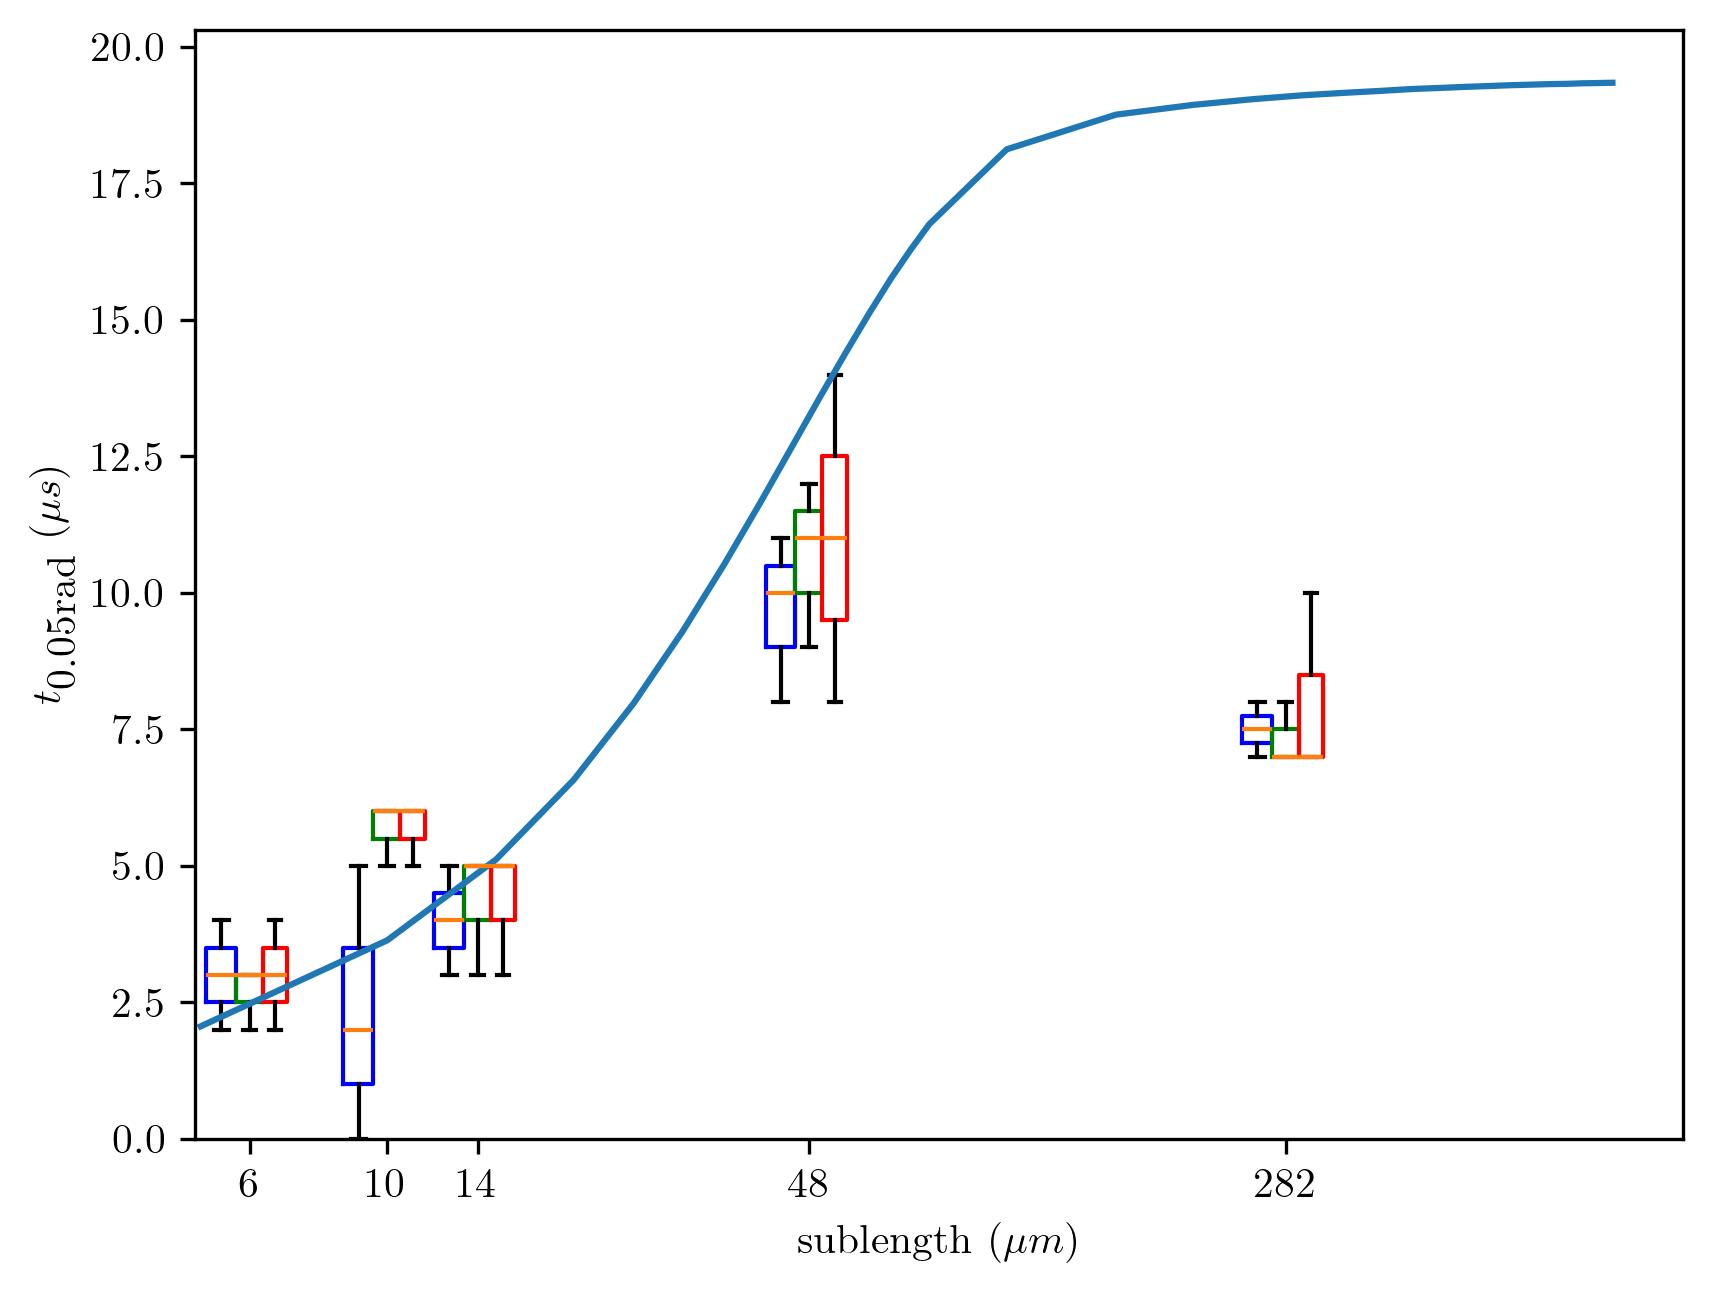

In [41]:
tresh=0.05
boxplotter(df,tresh,Q_select='low',plot='fit',wavelengths=[402,673,986])
#plt.twinx()
plotsimdata(simdata,lengthlist,tresh)
plt.ylabel(r'$t_\textrm{0.05rad}\ (\mu s)$')
plt.ylim(0)
plt.show()

# Model

In [9]:
from joblib import Parallel, delayed

chippath = '../DataKian/bTa_LT354chip3/'
filename = 'KID14_92dBm__TmK20_avgpulse_ampphase.csv' # try 92dBm and 96 of this KID, both have good pulses at all 3 wavelengths
length = 48
simtime = 500
dtinit=0.0005
dxfrac=1/5

lambdasinnm = [986]

KIDdict = {}
for lambdanm in lambdasinnm:
    KIDdict[lambdanm] = KID_data(chippath,lambdanm,filename,length)
    KIDdict[lambdanm].fit_tail(start=175,end=300,showplots=False) # actually calculate tauqp*

Ls=[]
for lambdanm in lambdasinnm:
    print(KIDdict[lambdanm].tauqpstar,KIDdict[lambdanm].tauqpstarstd)
    print(KIDdict[lambdanm].L)
    Ls.append(KIDdict[lambdanm].L)
L=np.mean(Ls) # use the same linear decay rate for all wavelengths

def par_func_plot(params):
     SIM = KID_sim(params,dtinit,dxfrac,simtime_approx=simtime,D_const=False,approx2D=False,ringingdtinterp=0.005)
     return SIM

def plotsim(eta,sigma,tau,Q0,lengthlist):
    datalist = Parallel(n_jobs=-1)(delayed(par_func_plot)(KID_params(eta_pb=eta,sigma_IC=sigma,trickle_time=tau,Q0=Q0,KID=KIDdict[lambdanm],L=L,length=length)) for length in lengthlist)
    plotdata = {}
    for obj,length in zip(datalist,lengthlist):
         plotdata[length]=obj
    return plotdata

lengthlist = list(range(5,80,5))+list(range(100,1000,50))
simdata = plotsim(0.9012569453,6.1100202291,0.0894235562,4.7676366878,lengthlist=lengthlist)

def plotsimdata(simdata,lengthlist,theta_tresh):
    decaytimes = []
    for length in lengthlist:
        t = simdata[length].t_axis_interp
        phase = simdata[length].phaseintime
        ttemp=t
        t=t[ttemp>=0]
        phase=phase[ttemp>=0]
        #plt.plot(t,phase,label=length)
        decaytimes.append(t[np.argmax(phase<=theta_tresh)])
    #plt.legend()
    #plt.show()
    plt.plot(lengthlist,decaytimes)


56.59994383967418 4.491649792276684
0.01766786205358462
Iteration: 1845	Simtime (us): 16.2346141974671264
Iteration: 1066	Simtime (us): 4.3273769397182697
Iteration: 3250	Simtime (us): 502.53198706803806
Iteration: 3549	Simtime (us): 503.27816845879384
Iteration: 3796	Simtime (us): 510.69349423946253
Iteration: 3378	Simtime (us): 72.654082879591446
Iteration: 4250	Simtime (us): 505.27848942416515
Iteration: 4466	Simtime (us): 500.13882243574085
Iteration: 3591	Simtime (us): 82.123546239245035
Iteration: 4635	Simtime (us): 500.31176861582225
Iteration: 4608	Simtime (us): 500.61495604935834
Iteration: 4688	Simtime (us): 505.01645652615105
Iteration: 4764	Simtime (us): 502.368004523105645
Iteration: 4841	Simtime (us): 500.728003799153634
Iteration: 4920	Simtime (us): 500.258989604734046
Iteration: 2787	Simtime (us): 38.6908077698340246
Iteration: 5269	Simtime (us): 500.532008993952844
Iteration: 5324	Simtime (us): 500.385861371411264
Iteration: 5347	Simtime (us): 500.519298537369656
Itera